<a href="https://colab.research.google.com/github/Rajeeb321123/Deep-learning-tensorFlow-Journey/blob/master/09_SkimLit_nlp_milestone_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MileStone Project 2: SkimLit📃🔥

The purpose of this notebook is to build an NLP model to make reading medical abstacts easier.

The paper we're replicating (the source of the dataset that we'll be using **PubMed 200k RCT**) is available here: https://arxiv.org/abs/1710.06071

And reading throughn the paper above, we see that the model architecture (**Neural Networks for Joint Sentence Classification in Medical Paper Abstracts**) that they used to achieve the best result is here: https://arxiv.org/abs/1612.05251

If you want to find the ground truth for this notebook (with lots of diagram and text annotation) see the github: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/09_SkimLit_nlp_milestone_project_2.ipynb

## Confirm access to GPU

In [ ]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


## Get the data

Since we'll be relicating the paper above (PubMed 200k RCT), Let's download the datset they used.

We can do so from Authers GitHub: https://github.com/Franck-Dernoncourt/pubmed-rct

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 27.22 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
# Check what files are in the PubMed_20k Dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [ ]:
# Start ou experiment using the 20k dataset with numbers replaced by "@" sign
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os
os.listdir(data_dir)

['test.txt', 'train.txt', 'dev.txt']

In [ ]:
# Check all of the filename in the target directory
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

## Preprocess data

Now we've got some text data, it's time to become one with it.

And one of the best ways to become one with data is to...

> Visualize, visualize, visualize

Let's write a function to read in all of the lines of a target text file.

In [ ]:
# Create a function to read the line of a document
def get_lines(filename):
  """
  Reads filename (a text filename) and returns the lines of text as a lists.

  Args:
    filename:  a string containing the target filepath.

  Returns:
    A List of strings with one string per line from the target filename.
  """

  # with is simialr to try/finally
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
# Let's read in the training lines
train_lines = get_lines(data_dir + "train.txt") # read the line for training file
train_lines[:28]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

In [ ]:
len('CONCLUSIONS\t')

12

In [ ]:
a = [1, 2, 3, 4, 5]

In [ ]:
for i  in range(3):
  print(a[-i-1])

5
4
3


Let's think about how we want our data to look.

How I think our data would be represented?

```
[
  {
    'line_number': 0,
    'target': 'BACKGROUND',
    'text': Emotional eating is associated with overeating and the development of obesity .\n',
    'total_lines': 11
  },
  ...
]
```

In [ ]:
# My own logic: correct
# But exceed our Cpu limit. our time complexity seems to be shit
# seem like i misunderstood line number but its alright

abstract_number = -1
list_of_dic = []
dic_to_be_added = {}
total_lines = -1

for i in train_lines[:28]:

  if ( i[:3] == '###'):
    abstract_number += 1


    continue
  if (i == '\n'):
    for j in range(total_lines + 1): # for updating total_lines values
      list_of_dic[-1-j]["total_lines"] = total_lines

    total_lines = -1
    continue

  total_lines += 1

  if (i[:11] == 'BACKGROUND\t'):
    dic_to_be_added["abstract_number"] = abstract_number
    dic_to_be_added["target"] = 'BACKGROUND'
    dic_to_be_added["text"] = i[11:-1]
    list_of_dic.append(dic_to_be_added)
    dic_to_be_added = {}
    continue
    # print(i[11:-1])

  if (i[:10] == 'OBJECTIVE\t'):
    dic_to_be_added["abstract_number"] = abstract_number
    dic_to_be_added["target"] = 'OBJECTIVE'
    dic_to_be_added["text"] = i[10:-1]
    list_of_dic.append(dic_to_be_added)
    dic_to_be_added = {}
    continue

  if (i[:8] == 'METHODS\t'):
    dic_to_be_added["abstract_number"] = abstract_number
    dic_to_be_added["target"] = 'METHODS'
    dic_to_be_added["text"] = i[8:-1]
    list_of_dic.append(dic_to_be_added)
    dic_to_be_added = {}
    continue


  if (i[:8] == 'RESULTS\t'):
    dic_to_be_added["abstract_number"] = abstract_number
    dic_to_be_added["target"] = 'RESULTS'
    dic_to_be_added["text"] = i[8:-1]
    list_of_dic.append(dic_to_be_added)
    dic_to_be_added = {}
    continue

  if (i[:12] == 'CONCLUSIONS\t'):
    dic_to_be_added["abstract_number"] = abstract_number
    dic_to_be_added["target"] = 'CONCLUSIONS'
    dic_to_be_added["text"] = i[12:-1]
    list_of_dic.append(dic_to_be_added)
    dic_to_be_added = {}
    continue


print(list_of_dic)

[{'abstract_number': 0, 'target': 'OBJECTIVE', 'text': 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .', 'total_lines': 11}, {'abstract_number': 0, 'target': 'METHODS', 'text': 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .', 'total_lines': 11}, {'abstract_number': 0, 'target': 'METHODS', 'text': 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .', 'total_lines': 11}, {'abstract_number': 0, 'target': 'METHODS', 'text': 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .', 'total_lines': 11}, {'abstract_number': 0, 'target': 'METHODS', 'text': 'Secondary outcome measures included the Wester

In [ ]:
len(list_of_dic)

23

In [ ]:
import pandas as pd
list_of_dic_df = pd.DataFrame(list_of_dic)
list_of_dic_df

,abstract_number,target,text,total_lines
0,0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,11
1,0,METHODS,A total of @ patients with primary knee OA wer...,11
2,0,METHODS,Outcome measures included pain reduction and i...,11
3,0,METHODS,Pain was assessed using the visual analog pain...,11
4,0,METHODS,Secondary outcome measures included the Wester...,11
5,0,METHODS,"Serum levels of interleukin @ ( IL-@ ) , IL-@ ...",11
6,0,RESULTS,There was a clinically relevant reduction in t...,11
7,0,RESULTS,The mean difference between treatment arms ( @...,11
8,0,RESULTS,"Further , there was a clinically relevant redu...",11
9,0,RESULTS,These differences remained significant at @ we...,11


In [ ]:
a='aa\n'
a.isspace()

False

In [ ]:
a='\n'
a.isspace()

True

In [ ]:
# Dbruke logic

# very important to look at the train_lines in above to visualize the data and how it is formatted
def preprocess_text_with_line_numbers(filename):
  """
  Return a list of dictionaries of abstract line data.

  Takes in filename, reads it contents and sort through each line,
  extracting things like the target label, the text of sentence,
  how many sentences are in the current abstract and what sentence number the target line is.
  """

  input_lines = get_lines(filename) # get all lines from filename

  # abstract are separated by '/n' and '###24293578\n'
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create and empty list of abstracts

  # Loop through each line in the target file
  for line in input_lines:

    # at the start of each abstract
    if line.startswith("###"): # check to see if the line is an ID line
      abstract_id = line
      abstract_lines = "" # reset the abstract string if the line is an ID line


    # the end of each abstract: we know we have '\n' at the end of each abstract (1 abstract: whole collection of background, methond, objective...)
    # elif line == '\n'
    elif line.isspace(): # means is it '\n' # check if the line is new line. if we reach end of the each line_number
      # now we again split line for each background, objective...
      # return list of each list
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines or it won string like ['hello i am Rajeeb', "todayis good day']"

      # Iterate thorugh each line in a single abstract and count them at the same time.
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create an empty dictionary for each line
        target_text_split = abstract_line.split("\t") # split target label from text eg: [objective\tHello] ---> [objective, Hello]
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it # probably no need for lower for do it anyway.
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract
        line_data["total_lines"]  = len(abstract_line_split)-1 # how many total lines are there in target abstract (start from 0 i.e - 1)
        abstract_samples.append(line_data) # add line data to abstract sample list

    # if we are in BACKGROUND, or OBJECTIVE, OR REUSLTS .... (not at the start of abstract (###) or end ('\n') )
    else: # if the above condition aren't fulfilled the line contains a labelled sentence
      abstract_lines += line # adding whole element to abstract_lines so it can be formatted later in above elif condition when we reach the end of abstrac

  return abstract_samples


In [ ]:
# Get data from file and preprocess it
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # another txt file
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")

len(train_samples), len(val_samples), len(test_samples)

CPU times: user 909 ms, sys: 192 ms, total: 1.1 s
Wall time: 1.67 s


(180040, 30212, 30135)

In [ ]:
# Check the first abstract of our training data
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

Now that our data is the format of a list of dictionaries, how about we turn it into a DataGram to further visualize it.

In [ ]:
import pandas as pd

train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)


,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
# Distribution of labels in training data
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

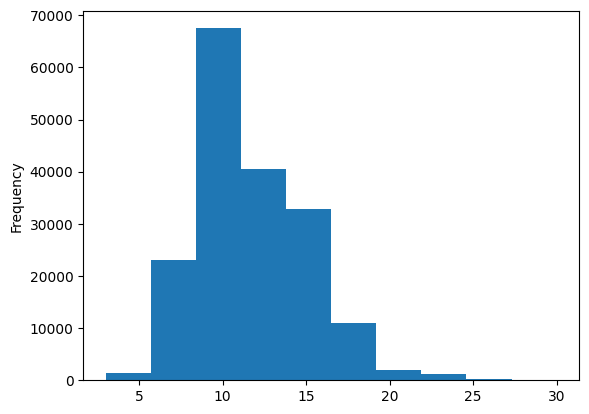

In [ ]:
# Let's check the length of different lines
train_df.total_lines.plot.hist();

### Get lists of sentences

In [ ]:
# Convert abstract text lines into lists
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [ ]:
# View the 10 lines of training sentences
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Make numeric labels (ML models require labels)

In [ ]:
# # One hot encode labels
# from sklearn.preprocessing import OneHotEncoder
# one_hot_encoder = OneHotEncoder(sparse=False) # we want non-sparse matrix
# train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy()) # sure: shape error got 1D but needed 2D

# # Check out our one hot encoded labels
# train_labels_one_hot

In [ ]:
# One hot encode labels of train data
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False) # we want non-sparse matrix as tensorflow is incompatible with sparse matrix
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Check out our one hot encoded labels
train_labels_one_hot[:10], val_labels_one_hot[:10], test_labels_one_hot[:10]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(array([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]]),
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.]]),
 array([[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.]]))

In [ ]:
import tensorflow as tf
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

### Labels: encode Labels

In [ ]:
# Extract label {"target" columns} and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_label_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check out training labels
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
# Get class names and number of classes from label encoder instances
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names


(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Starting a series of modelling experiments...

As usual, we're going to be trying our a bunch of different models and seeing which one works bes.

And as always, we're going to start with a baseline (TF-IDF multinomial Naive Bayes Classifier).

Great resources and teacher: https://chrisalbon.com/Home

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #Convert a collection of raw documents to a matrix of TF-IDF features or vectors.
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling Pipeline
model_0 = Pipeline([
    # Tuple
    ("tfidf", TfidfVectorizer()), # Convert words to number using tfidf
    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(X=train_sentences, y=train_labels_encoded) # multinomialNB doesnot support one hot encoded, just label encoder

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels_encoded)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 72.18%


In [ ]:
# Make predictions using our baseline model
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

### Download helper function script

In previous module, we wrote a function to compare prediction accross different matrics (accuracy, precision, recall, f1) and rather than rewriting it here, let's download it from helper function:
https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-04-12 12:44:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-04-12 12:44:58 (73.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)

baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

### Preparin our data (the text) for deep sequence models

Before we start building deeper model, we've go to create vectorization and embedding layers.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [ ]:
# use the default TextVectorization parameters
# This is only the default bu we will modify later here.
#max_token=10000 means only 10000 most common word
text_vectorizer = TextVectorization(max_tokens=None, # How many words in our vocabulary: None: no limit ( automaically add <00V>)
                                    standardize = 'lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None, # n-words:join splitted words before tokenizaion. None:each word, each token
                                    output_mode='int', # how to map token to token. here int but can be specific function like tf_idf
                                    #How long do we want our sequence to be : 50 ,100, None..
                                    #automatially set sequence to longest sequence or tweet lenght. add zero ad end for short tweets
                                    output_sequence_length=None, # Batch need to same length. Eg here Each Tweet length are different
                                    # aadd zero ad end for short tweets to match (output_sequence_length: none: means longest one)
                                    pad_to_max_tokens=False #if true reult in shape (Batch_size, Max_tokesn)
                                    )

In [ ]:
# How long is each senctences in average
sent_lens=[len(i.split()) for i in train_sentences]

avg_sent_len = np.mean(sent_lens)
avg_sent_len
# seem no of token or words is 26

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

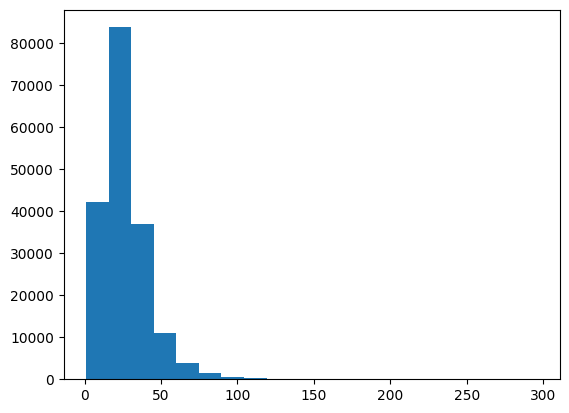

In [ ]:
# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=20)

# vast majority of sentences are under 50 words

In [ ]:
# How long of a sentences length coers 95% of examples? how long our max_lenght should be so it covers most of the sentences
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

# This is saying 95% of sentences are under 55

55

In [ ]:
# Max sequence length in the training set
max(sent_lens)
# ridiculous to set max_length to 296
# best is 55 for performance without losing accuracy

296

In [ ]:
# Setup text Vectorization variable
max_vocab_length = 10000 # max number of words  to have in our vocabulary
# 15 from round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))
max_length= 26 # max length our sequence will be (e.g. how many words from a tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length = max_length,
                                    pad_to_max_tokens=True,
                                    )

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentences and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 26), dtype=int64, numpy=
array([[1, 8, 1, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]])>

In [ ]:
import random
# Choose  a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 the data collected for analysis were from a placebo-controlled period of variable duration and pooled across both studies .      

Vectorized version:


<tf.Tensor: shape=(1, 26), dtype=int64, numpy=
array([[   2,  100,  444,   11,   85,    9,   27,    8,  329,  173,    4,
        1251,  282,    3, 2206,  537,   54,  202,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
# How unique words from vocabulary we found in our train_sentence
# if Max_token: None as hyperparameter : automatically set no of words_in_vocab to each Unique word
# if Max_token: 10000 like we did : words_in_vocab will be 100000
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in our train_data
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:] # get the least common words

print(f"Number of words in vocab in train_data: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

#[UNK] means unkown: 10000 words may be small but its ok here

Number of words in vocab in train_data: 10000
5 most common words: ['', '[UNK]', 'the', 'and', 'of']
5 least common words: ['ethnically', 'ethambutol', 'ert', 'epicardial', 'ephedrine']


In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length, # set the input shape,
                              output_dim = 128, # Neural network especially that using GPU works greate with number divisible by 8 eg. 128
                              input_length = max_length, # how long is each input
                              )
embedding

In [ ]:
# for visualizaion only on random sentence

# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into dense vector of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 the objective of this study was to investigate how much individuals ' participation decision in noninvasive screening is affected by the presence or absence of detailed information about invasive follow-up testing and how this effect varies over screening tests .      

Embedded version:


<tf.Tensor: shape=(1, 26, 128), dtype=float32, numpy=
array([[[ 0.00273507, -0.01385794,  0.01808692, ...,  0.03331501,
          0.03536054, -0.01329985],
        [-0.02637637,  0.00186642,  0.0159932 , ..., -0.01497133,
          0.03244913,  0.0497493 ],
        [ 0.0163962 , -0.01434802,  0.0377676 , ..., -0.02730449,
         -0.02986101,  0.04476908],
        ...,
        [ 0.0163962 , -0.01434802,  0.0377676 , ..., -0.02730449,
         -0.02986101,  0.04476908],
        [-0.00161536, -0.02192098,  0.04306478, ...,  0.01492783,
         -0.00719055, -0.01891998],
        [ 0.02696243,  0.04803428, -0.04598786, ..., -0.02190814,
         -0.00402571,  0.00250162]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding for the first word of our sentence e.g. the
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.00273507, -0.01385794,  0.01808692, -0.01224893,  0.03283058,
         0.01786157,  0.00367309,  0.03344082,  0.030326  , -0.00641311,
         0.01612518, -0.04200979, -0.01426742, -0.04864473, -0.03269795,
         0.04884598, -0.04618756,  0.02208174, -0.04162885, -0.04480737,
         0.04073024, -0.03852765, -0.01380746, -0.02045804, -0.02208221,
        -0.02734749, -0.0136054 ,  0.04456493,  0.00814541, -0.04136032,
        -0.02738817,  0.04200948,  0.04351399,  0.03897152,  0.02674102,
        -0.04042289, -0.0137248 ,  0.01487296,  0.00750716,  0.04935303,
        -0.04949776,  0.00357783, -0.00240221,  0.01405152,  0.02370897,
         0.04233407, -0.00442705, -0.03989183, -0.04348624, -0.04988693,
         0.04059464,  0.04660218,  0.02383224,  0.00010967,  0.04391208,
         0.02799517, -0.04706619, -0.02101682, -0.04929486, -0.01915158,
        -0.03035334,  0.02316994, -0.01249857, -0.03792382,  0.04860662,
  

In [ ]:
# Test our embedding layer, Conv1D layer and max pooling
from tensorflow.keras import layers

embedding_test = embedding(text_vectorizer(["This is a test sentence"])) # Turn target to embedding
print(embedding_test.shape)

# Look at our 03_CNN file in drive to know each hyperparameter here, very easy
conv_1D = layers.Conv1D(filters=32,
                        kernel_size=5, # also ngram of 5 means looks at 5 words at a time.
                        strides=1, # default
                        activation="relu", # relu: negative value to zero and positive value to same as value. so there will lots of zero we look at the weight
                        # padding is a little complex what why how we do it google search it, stackoverflow valid vs same, CNN explainer.
                        padding="valid")# padding will compress input like 15 to 11 if 'valid' (default). if 'same' no-compression. 11 also depend upon kernel size
conv_1D_output = conv_1D(embedding_test) # pass test embedding through conv1D layer.
print(conv_1D_output.shape)
max_pool = layers.GlobalMaxPool1D() # GlobalAveragePool take average and GlobalMaxPool take Max
max_pool_output = max_pool(conv_1D_output) # equivalent to "get the most important feature" or "get the feature with highest value"
print(max_pool_output.shape)

(1, 26, 128)
(1, 22, 32)
(1, 32)


In [ ]:
# Build our Conv1D model
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)



x = layers.Conv1D(filters=64, # each review will diveded into 64 parts
                  kernel_size=5, # 5 words at a time
                  strides=1,
                  activation='relu',
                  padding='valid')(x) # padding will compress input like 15 to 13 if 'valid' (default). if 'same' no-compression
print(x.shape)

x = layers.GlobalMaxPool1D()(x) # Max Pool seems to be better for this data.
print(x.shape)

x = layers.Dense(64, activation="relu")(x)
print(x.shape)
outputs = layers.Dense(1, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_conv1D')

(None, 26, 128)
(None, 22, 64)
(None, 64)
(None, 64)


In [ ]:
# Compile  Conv1D
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary()
model_1.summary()

Model: "model_1_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_11 (Tex  (None, 26)                0         
 tVectorization)                                                 
                                                                 
 embedding (Embedding)       (None, 26, 128)           1280000   
                                                                 
 conv1d_10 (Conv1D)          (None, 22, 64)            41024     
                                                                 
 global_max_pooling1d_10 (G  (None, 64)                0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_13 (Dense)            (None, 64)             

In [ ]:
# It is imp for creating tensorboard callback if we are expreimenting with different model
# Create a tensorboard callback (need to create a new one of each model)
from helper_functions import  create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences,
                              train_labels_one_hot,
                              epochs=5,
                              validation_data=(val_sentences, val_labels_one_hot),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model__conv1d")])

Saving TensorBoard log files to: model_logs/model_1_conv1d/20240412-132150


ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'str'>"}), <class 'numpy.ndarray'>

In [ ]:
len(train_sentences)

180040